# Colon Disease Image Classification Model

In [234]:
#Importing nessecary packages
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio.v2 as imageio
from pathlib import Path 
import cv2
import glob
import skimage
from skimage.color import rgb2gray, gray2rgb
import tensorflow as tf
import keras
import pydot
import keras.utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

In [238]:
!pip install pydot

## Data Exploration

In [4]:
#test image
def show_imgs(img_folder):
    for i in range(6):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,6,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

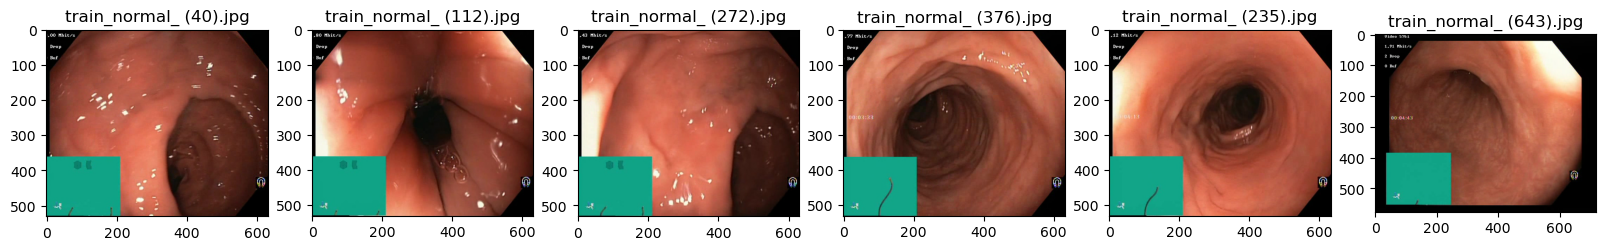

In [5]:
normal_train_folder=r'colon-image-data/train/0_normal'
plt.figure(figsize=(20, 20))
show_imgs(normal_train_folder)

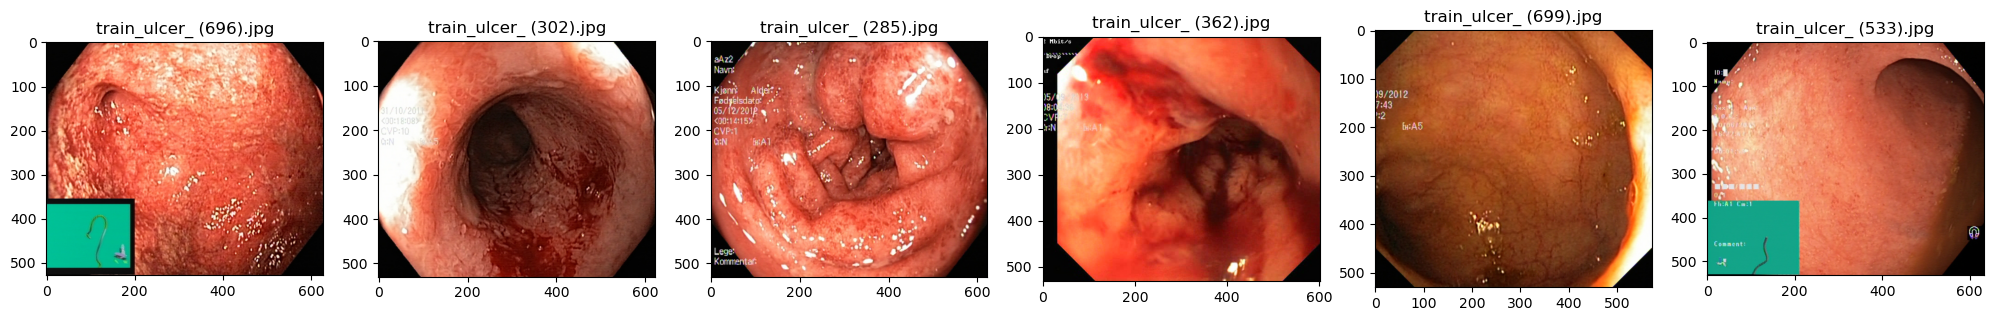

In [6]:
uc_train_folder=r'colon-image-data/train/1_ulcerative_colitis'
plt.figure(figsize=(25, 25))
show_imgs(uc_train_folder)

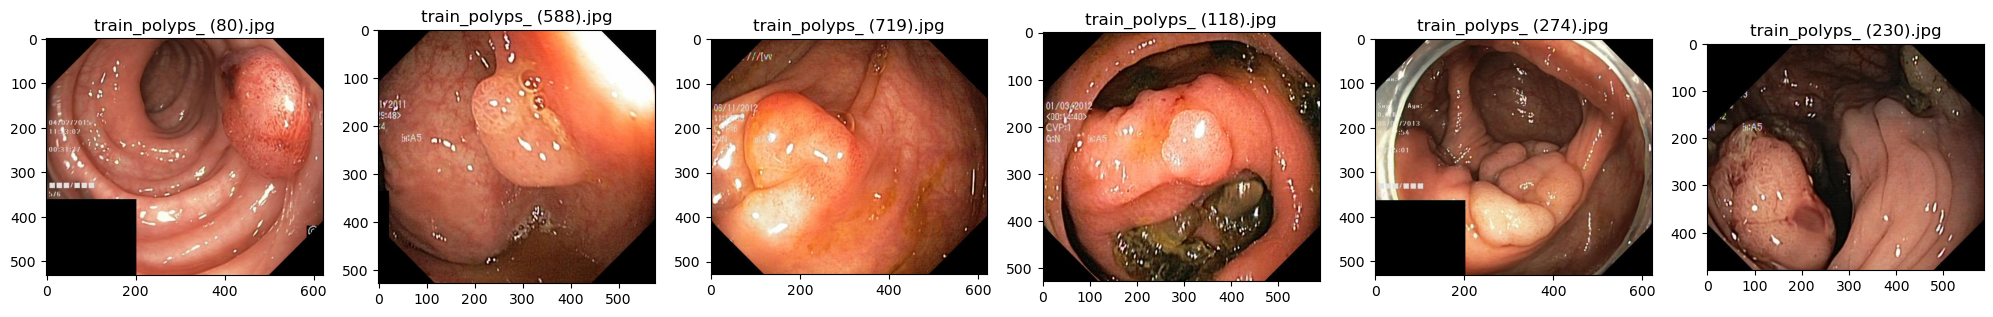

In [7]:
pol_train_folder=r'colon-image-data/train/2_polyps'
plt.figure(figsize=(25, 25))
show_imgs(pol_train_folder)

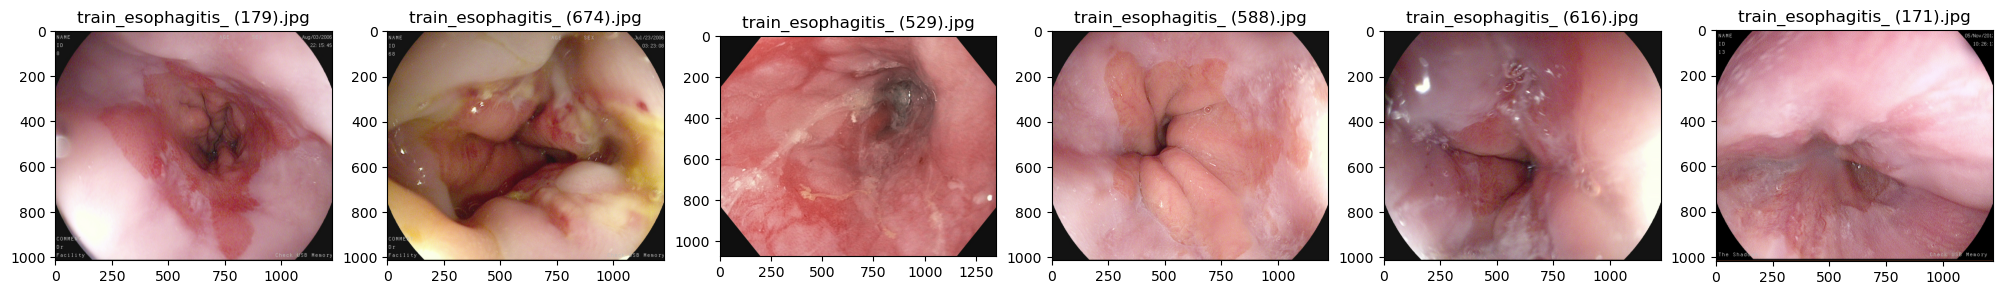

In [8]:
es_train_folder=r'colon-image-data/train/3_esophagitis'
plt.figure(figsize=(25, 25))
show_imgs(es_train_folder)

In [9]:
# Set the path dataset directory
train_path = 'colon-image-data/train/'
test_path = 'colon-image-data/test/'
val_path = 'colon-image-data/val/'
class_names = ['0_normal', 
                '1_ulcerative_colitis', 
                '2_polyps', 
                '3_esophagitis']

#### Train Data Frame

In [10]:
# iterate over files intrain path
files = Path(train_path).glob('*')
for file in files:
    print(file)

colon-image-data\train\0_normal
colon-image-data\train\1_ulcerative_colitis
colon-image-data\train\2_polyps
colon-image-data\train\3_esophagitis


In [11]:
normal_train_images = []
ulcerative_train_images = []
polyp_train_images = []
esophagitis_train_images = []
for images in glob.iglob(f'{normal_train_folder}/*'):
    if (images.endswith(".jpg")):
        normal_train_images.append(images)
for images in glob.iglob(f'{uc_train_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_train_images.append(images)
for images in glob.iglob(f'{pol_train_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_train_images.append(images)
for images in glob.iglob(f'{es_train_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_train_images.append(images)

In [12]:
train_df = pd.DataFrame({'normal':normal_train_images,'ulcerative':ulcerative_train_images,
                          'polyp':polyp_train_images,'esophagitis':esophagitis_train_images})

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       800 non-null    object
 1   ulcerative   800 non-null    object
 2   polyp        800 non-null    object
 3   esophagitis  800 non-null    object
dtypes: object(4)
memory usage: 25.1+ KB


<Axes: >

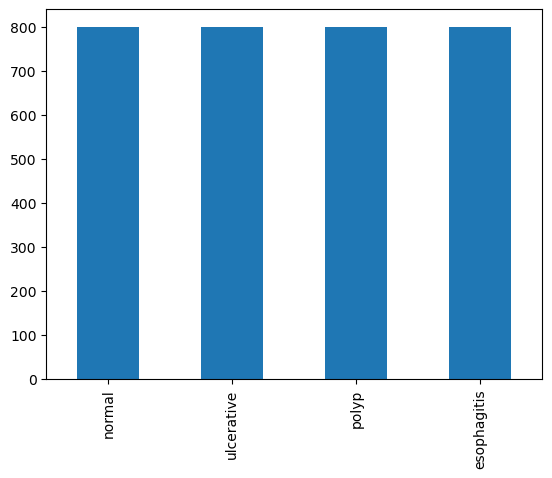

In [14]:
train_df.notnull().sum().plot(kind='bar')

#### Test Dataframe

In [15]:
# iterate over files in test path
files = Path(test_path).glob('*')
for file in files:
    print(file)

colon-image-data\test\0_normal
colon-image-data\test\1_ulcerative_colitis
colon-image-data\test\2_polyps
colon-image-data\test\3_esophagitis


In [16]:
normal_test_folder = 'colon-image-data/test/0_normal'
uc_test_folder = 'colon-image-data/test/1_ulcerative_colitis'
pol_test_folder = 'colon-image-data/test/2_polyps'
es_test_folder = 'colon-image-data/test/3_esophagitis'

In [17]:
normal_test_images = []
ulcerative_test_images = []
polyp_test_images = []
esophagitis_test_images = []
for images in glob.iglob(f'{normal_test_folder}/*'):
    if (images.endswith(".jpg")):
        normal_test_images.append(images)
for images in glob.iglob(f'{uc_test_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_test_images.append(images)
for images in glob.iglob(f'{pol_test_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_test_images.append(images)
for images in glob.iglob(f'{es_test_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_test_images.append(images)

In [18]:
test_df = pd.DataFrame({'normal':normal_test_images,'ulcerative':ulcerative_test_images,
                          'polyp':polyp_test_images,'esophagitis':esophagitis_test_images})

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       200 non-null    object
 1   ulcerative   200 non-null    object
 2   polyp        200 non-null    object
 3   esophagitis  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


<Axes: >

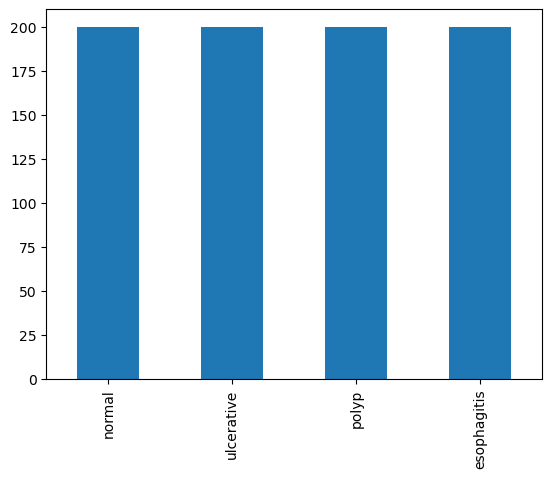

In [20]:
test_df.notnull().sum().plot(kind='bar')

#### Validation DataFrame

In [21]:
# iterate over files intrain path
files = Path(val_path).glob('*')
for file in files:
    print(file)

colon-image-data\val\0_normal
colon-image-data\val\1_ulcerative_colitis
colon-image-data\val\2_polyps
colon-image-data\val\3_esophagitis


In [22]:
normal_val_folder = 'colon-image-data/val/0_normal'
uc_val_folder = 'colon-image-data/val/1_ulcerative_colitis'
pol_val_folder = 'colon-image-data/val/2_polyps'
es_val_folder = 'colon-image-data/val/3_esophagitis'

In [23]:
normal_val_images = []
ulcerative_val_images = []
polyp_val_images = []
esophagitis_val_images = []
for images in glob.iglob(f'{normal_val_folder}/*'):
    if (images.endswith(".jpg")):
        normal_val_images.append(images)
for images in glob.iglob(f'{uc_val_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_val_images.append(images)
for images in glob.iglob(f'{pol_val_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_val_images.append(images)
for images in glob.iglob(f'{es_val_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_val_images.append(images)

In [24]:
val_df = pd.DataFrame({'normal':normal_val_images,'ulcerative':ulcerative_val_images,
                          'polyp':polyp_val_images,'esophagitis':esophagitis_val_images})

In [25]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       500 non-null    object
 1   ulcerative   500 non-null    object
 2   polyp        500 non-null    object
 3   esophagitis  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


<Axes: >

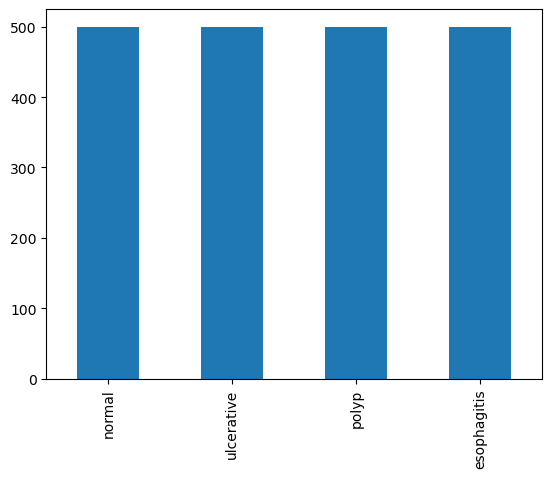

In [26]:
val_df.notnull().sum().plot(kind='bar')

## Normalization

In [27]:
# being with test image
#define normalization function (using 255 since pixel ranges are from 0 to 255)
def normalize(img):
    immin=float(img.min())
    immax=float(img.max())
    return np.floor((img-immin)/(immax-immin)*255)

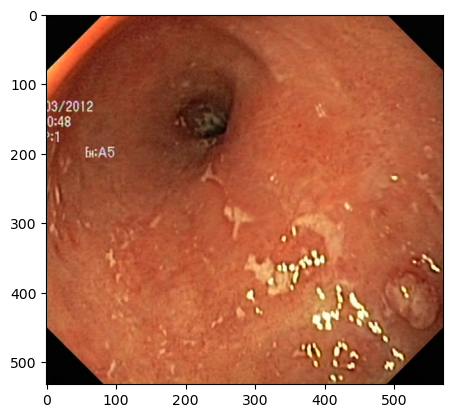

In [28]:
img = plt.imread(r'colon-image-data/train/1_ulcerative_colitis/train_ulcer_ (120).jpg')
plt.imshow(img.astype('uint8'))

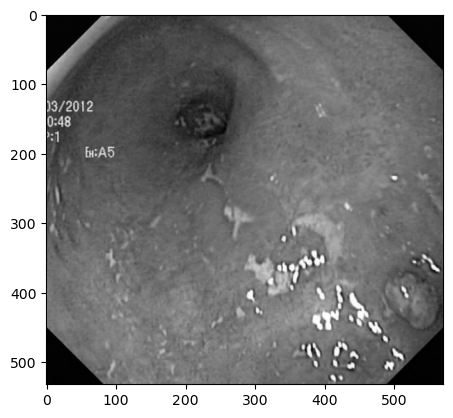

In [29]:
gray_img = skimage.color.rgb2gray(img)
plt.imshow(gray_img, cmap = 'gray')

In [30]:
n_img = normalize(img)
plt.imshow(n_img.astype('uint8'))

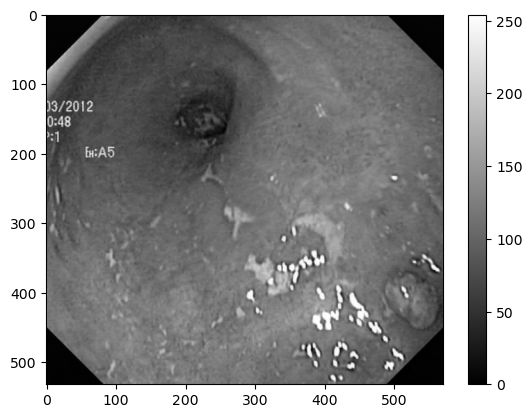

In [31]:
gray_nimg = skimage.color.rgb2gray(n_img)
plt.imshow(gray_nimg, cmap = 'gray')
plt.colorbar()


In [32]:
print(img-n_img)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [33]:
print(gray_img-gray_nimg)

[[-3.98431373 -3.98431373 -3.98431373 ... -4.98039216 -3.98431373
  -3.98431373]
 [-2.98823529 -2.98823529 -2.98823529 ... -3.98431373 -3.98431373
  -3.98431373]
 [-2.98823529 -2.98823529 -2.98823529 ... -2.98823529 -2.98823529
  -2.98823529]
 ...
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]]


In [34]:
#actual normalization in this model will be applied with keras

### Processing using Tensorflow keras

In [288]:
batch_size=28
#scaling performed by deviding by 255
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   fill_mode='constant')
val_datagen = ImageDataGenerator(rescale = 1. / 255,
                                 fill_mode='constant')
test_datagen = ImageDataGenerator(rescale = 1. / 255,
                                  fill_mode='constant')

train_gen = train_datagen.flow_from_directory(
        train_path,
        class_mode='categorical',
        batch_size=batch_size,
        seed=42,
        classes=class_names)

val_gen = val_datagen.flow_from_directory(
        val_path,
        class_mode='categorical',
        batch_size=batch_size,
        seed=42,
        classes=class_names)

test_gen = test_datagen.flow_from_directory(
        test_path,
        class_mode='categorical',
        seed=42,
        batch_size=batch_size,
        classes=class_names)

#print samples per class
train_quant = len(train_gen.filenames)
val_quant = len(val_gen.filenames)
test_quant = len(test_gen.filenames)

print("Train samples:", train_quant)
print("Validation samples:", val_quant)
print("Test samples:", test_quant)

#check the class indices
train_gen.class_indices
val_gen.class_indices
test_gen.class_indices

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Train samples: 3200
Validation samples: 2000
Test samples: 800


{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


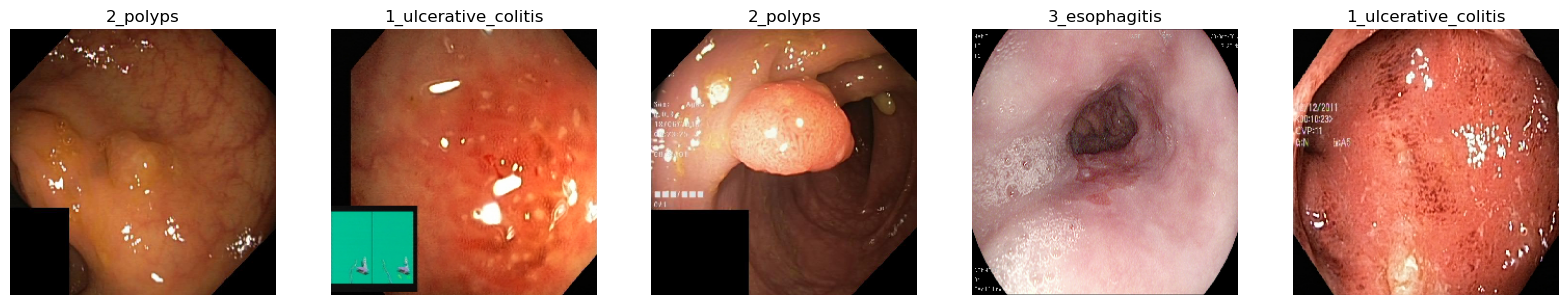

In [174]:
def image_samples(gen ):
    x_dict=gen.class_indices
    classes=list(x_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=5
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i]       
        plt.imshow(image)
        print(image.shape)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name)
        plt.axis('off')
    plt.show()
    
image_samples(train_gen)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


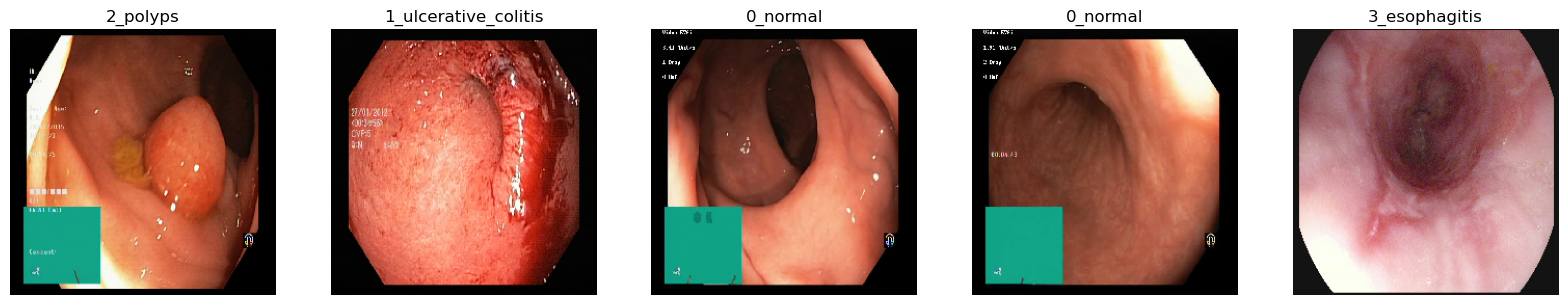

In [190]:
image_samples(test_gen)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


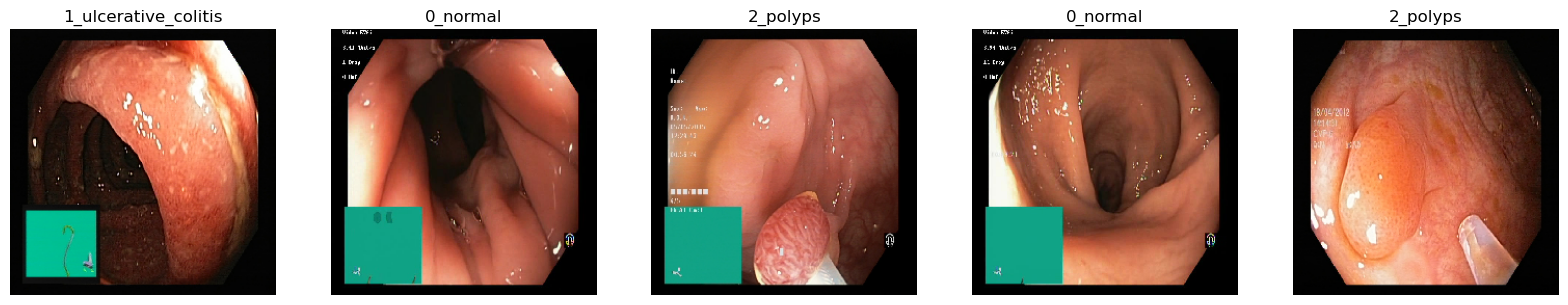

In [189]:
image_samples(val_gen)

## Building model

In [303]:
print('Num of GPUs available: ', len(tf.config.list_physical_devices('GPU')))

Num of GPUs available:  0


In [311]:
#apply transfer learning
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet',
                                                     input_shape=(256,256,3),classes=4)

In [312]:
base_model.trainable=False

In [313]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization(input_shape=(256,256,3)))
model.add(Conv2D(filters=32, kernel_size=7, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
#model.add(tf.keras.layers.AlphaDropout(0.2))
model.add(Dense(32,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.8))
model.add(Dense(16,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.8))
model.add(Dense(4,activation='softmax'))

In [314]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_1477 (B  (None, 6, 6, 1536)       6144      
 atchNormalization)                                              
                                                                 
 conv2d_1524 (Conv2D)        (None, 6, 6, 32)          2408480   
                                                                 
 conv2d_1525 (Conv2D)        (None, 6, 6, 16)          12816     
                                                                 
 conv2d_1526 (Conv2D)        (None, 6, 6, 16)          2320      
                                                                 
 global_average_pooling2d_33  (None, 16)             

In [315]:
early = tf.keras.callbacks.EarlyStopping( patience=3,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [316]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [317]:
model = model.fit(train_gen, steps_per_epoch=(train_quant/batch_size),
validation_data=val_gen, validation_steps=(val_quant/batch_size),epochs=15, callbacks=[early])

Epoch 1/15
114/114 [==============================] - 1015s 9s/step - loss: 0.2831 - accuracy: 0.8800 - val_loss: 0.2630 - val_accuracy: 0.8955
Epoch 2/15
114/114 [==============================] - 1009s 9s/step - loss: 0.0839 - accuracy: 0.9744 - val_loss: 0.1888 - val_accuracy: 0.9400
Epoch 3/15
114/114 [==============================] - 1027s 9s/step - loss: 0.0363 - accuracy: 0.9875 - val_loss: 0.1283 - val_accuracy: 0.9555
Epoch 4/15
114/114 [==============================] - 1029s 9s/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.1105 - val_accuracy: 0.9655
Epoch 5/15
114/114 [==============================] - 1030s 9s/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.1062 - val_accuracy: 0.9675
Epoch 6/15
114/114 [==============================] - 1030s 9s/step - loss: 0.0357 - accuracy: 0.9928 - val_loss: 0.3559 - val_accuracy: 0.9100
Epoch 7/15
114/114 [==============================] - 1035s 9s/step - loss: 0.0447 - accuracy: 0.9891 - val_loss: 0.2267 - val_accuracy:

In [185]:
model.evaluate(train_gen)

100/100 [==============================] - 109s 1s/step - loss: 0.2056 - accuracy: 0.9456


[0.20556463301181793, 0.9456250071525574]

In [188]:
model.evaluate(val_gen)

63/63 [==============================] - 76s 1s/step - loss: 1.7995 - accuracy: 0.4550


[1.7994544506072998, 0.45500001311302185]

In [192]:
model.evaluate(test_gen)

25/25 [==============================] - 45s 2s/step - loss: 1.7676 - accuracy: 0.4638


[1.7675918340682983, 0.4637500047683716]

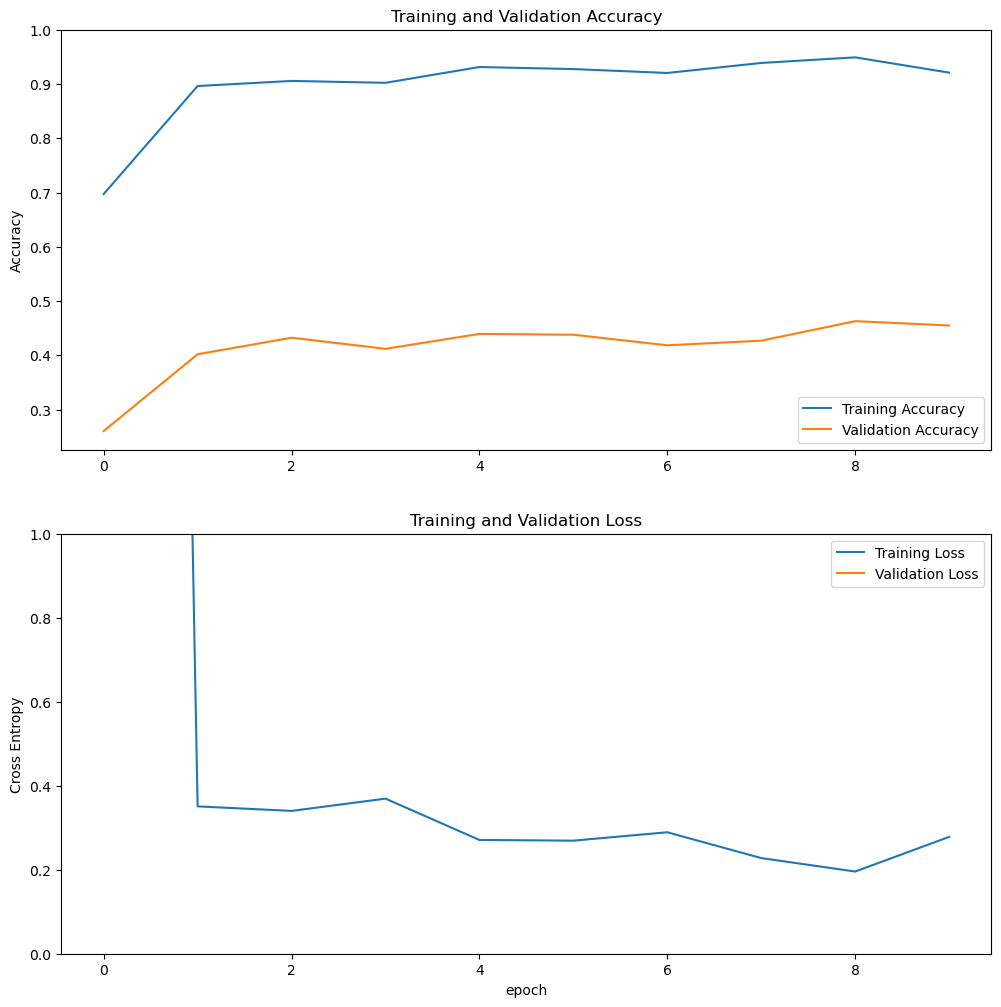

In [186]:
# plot accuracies and learning rate
acc = model_train.history['accuracy']
val_acc = model_train.history['val_accuracy']

loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

#accuracy
plt.figure(figsize=(10, 16))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:
          {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()


In [1]:
test_gen_pred = model.predict(test_gen, test_quant/batch_size, workers=1)

#print classification report and plot confusion matrix
print(classification_report(test_gen,test_gen_pred.argmax(axis=-1),
                            target_names=class_names, digits=4))
# Compute confusion matrix
test_cnf_matrix = confusion_matrix(test_gen,test_gen_pred..argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25, 5.25))
confusion_matrix_test(test_cnf_matrix, classes=target_names)
plt.tight_layout()

SyntaxError: invalid syntax (2401138379.py, line 7)

In [ ]:
predictions = []
 
for image in sample.id:
    img = tf.keras.preprocessing.image.load_img(test_path +'/'+ image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
    img = tf.reshape(img, (-1, 331, 331, 3))
    prediction = model.predict(img/255)
    predictions.append(np.argmax(prediction))
 
my_submission = pd.DataFrame({'image_id': sample.id, 'label':  predictions})
my_submission.to_csv('submission.csv', index=False)
 
# Submission file output
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(test_gen, test_gen_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
roc_auc = roc_auc_score(labels, predictions)

In [187]:
from keras.preprocessing import image
img = imageio.load_img('colon-image-data/test/3_esophagitis/test_esophagitis_ (12).jpg',target_size=(255,255))
img = imageio.img_to_array(img)
img = np.expand_dims(imag,axis=0) 
prediction = model.predict(img)
print(ypred)
x=np.argmax(prediction,-1)
if x==0:
    pimg='Normal'
elif x==1:
    pimg='Ulcerative colitis'
elif x==2:
    pimg='Polyp'
else:
    pimg='Esophagitis'  

plt.imshow(img)
print('The image is predicted as: '+str(img))  

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'